In [1]:
# %matplotlib widget
from sympy import *
from spb import *
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import Markdown as md

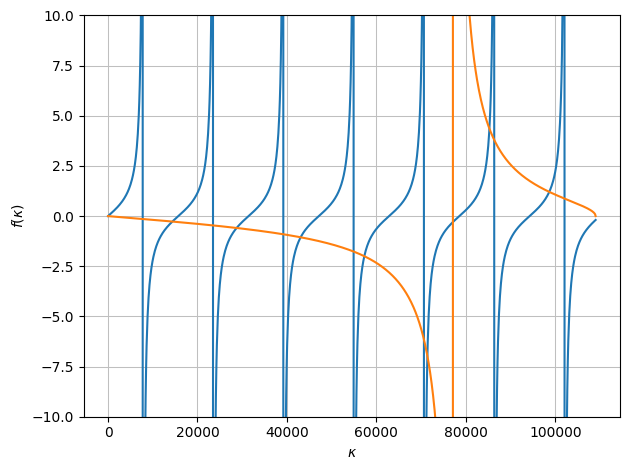

In [2]:
nf=2; ns=1.44; nc=1.44

h=0.0002 # cm

kappa = symbols("kappa")
wavelength = 0.8 * 10 ** -4  # cm
k = 2 * pi / wavelength
beta = sqrt(k ** 2 * nf ** 2 - kappa ** 2)
kappamax = sqrt(k ** 2 * nf ** 2 - k ** 2 * ns ** 2)
gammas = sqrt(beta ** 2 - k ** 2 * ns ** 2)
gammac = sqrt(beta ** 2 - k ** 2 * nc ** 2)

rhs = tan(kappa * h)
lhs = (gammas + gammac) / (kappa * (1 - gammas * gammac / kappa ** 2))

plot(rhs, lhs, (kappa, 1, kappamax), ylim=(-10, 10), label=[None, None])

In [3]:
# find solutions using approximate values
kappas = [
    nsolve(rhs - lhs, 1.4 * 10 ** 4),
    nsolve(rhs - lhs, 2.8 * 10 ** 4),
    nsolve(rhs - lhs, 4.3 * 10 ** 4),
    nsolve(rhs - lhs, 5.7 * 10 ** 4),
    nsolve(rhs - lhs, 7.2 * 10 ** 4),
    nsolve(rhs - lhs, 8.5 * 10 ** 4),
    nsolve(rhs - lhs, 9.8 * 10 ** 4),
]

In [4]:
n_eff = beta / k

output = """
| $\kappa$ | $\\beta$ | $n_{eff}$ |
|----------|----------|-----------|
"""

for ka in kappas:
    n_eff = beta / k
    output += f"| {kappa.evalf(subs={kappa: ka}):0.2f} | {beta.evalf(subs={kappa: ka}):0.2f} | {n_eff.evalf(subs={kappa: ka}):0.2f} |\n"

md(output)
    


| $\kappa$ | $\beta$ | $n_{eff}$ |
|----------|----------|-----------|
| 14384.53 | 156419.62 | 1.99 |
| 28747.22 | 154426.71 | 1.97 |
| 43062.80 | 151061.60 | 1.92 |
| 57297.42 | 146256.68 | 1.86 |
| 71398.32 | 139915.30 | 1.78 |
| 85266.03 | 131923.14 | 1.68 |
| 98643.96 | 122243.12 | 1.56 |


In [5]:
x = symbols("x")

wave = Piecewise(
    ((cos(kappa * h) + (gammac / kappa) * sin(kappa * h)) * E ** (gammas * (x + h)), x <= -h),
    (cos(kappa * x) - (gammac / kappa) * sin(kappa * x), x <= 0),
    (E ** (-gammac * x), x > 0),
)

# Normalize the wave
wave /= sqrt(integrate(wave ** 2, (x, -0.001, 0.0002)))


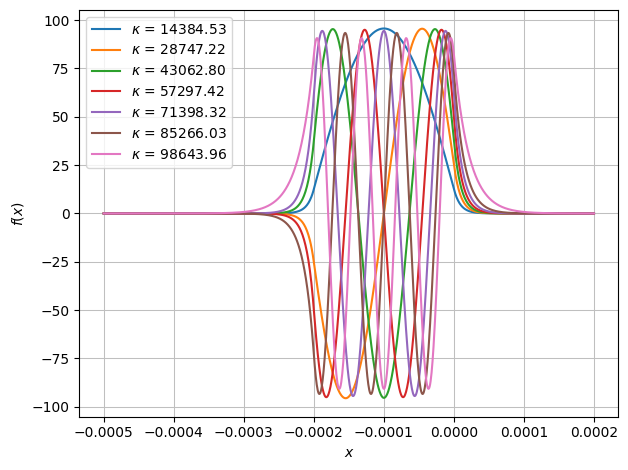

In [6]:
plot(*[wave.subs({kappa: k}) for k in kappas ], (x, -h - 0.0003, 0.0002), label = [f"$\kappa$ = {kappa:0.2f}" for kappa in kappas])

In [12]:
n_eff = beta / k

output = """
| $\kappa$ | $\\gamma_c$ | $\\gamma_s$ |
|----------|----------|-----------|
"""

for ka in kappas:
    n_eff = beta / k
    output += f"| {kappa.evalf(subs={kappa: ka}):0.2f} | {gammac.evalf(subs={kappa: ka}):0.2f} | {gammas.evalf(subs={kappa: ka}):0.2f} |\n"

md(output)
    


| $\kappa$ | $\gamma_c$ | $\gamma_s$ |
|----------|----------|-----------|
| 14384.53 | 108055.95 | 108055.95 |
| 28747.22 | 105150.37 | 105150.37 |
| 43062.80 | 100142.89 | 100142.89 |
| 57297.42 | 92736.24 | 92736.24 |
| 71398.32 | 82372.83 | 82372.83 |
| 85266.03 | 67916.92 | 67916.92 |
| 98643.96 | 46393.67 | 46393.67 |


In [7]:
def compute_orthogonality(a, b):
    prod = wave.subs({kappa: a}) * wave.subs({kappa: b})
    return float(integrate(prod.evalf(), (x, -oo, oo)).evalf())

In [8]:
ortho_matrix = [[compute_orthogonality(a, b) for a in kappas] for b in kappas]

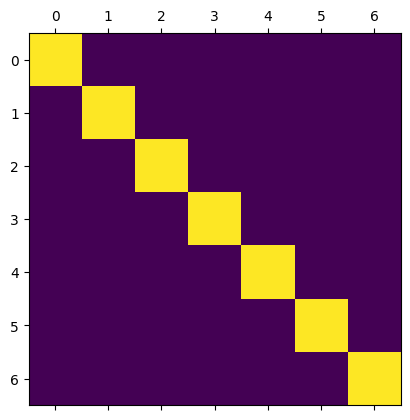

In [9]:
plt.matshow(ortho_matrix)

In [10]:
Matrix(ortho_matrix)

Matrix([
[                  1.0,  5.00259597011916e-17,   -8.180354943142e-17,    8.777714819654e-18,  9.41734524641838e-18, -1.23627139340587e-17, -4.47325816899331e-17],
[ 5.00259597011916e-17,                   1.0,  2.64427149917765e-16,  1.97504873515069e-17, -6.60239048419151e-17,  5.10301922790077e-17,  -1.0493817095019e-17],
[  -8.180354943142e-17,  2.64427149917765e-16,                   1.0, -3.47570857443648e-16,  2.91098041744901e-16, -1.91608187407407e-16,  8.84935160137015e-17],
[   8.777714819654e-18,  1.97504873515069e-17, -3.47570857443648e-16,                   1.0, -3.00144726940982e-16,  1.09093135931899e-16,  2.93379167370707e-17],
[ 9.41734524641838e-18, -6.60239048419151e-17,  2.91098041744901e-16, -3.00144726940982e-16,                   1.0,  1.71082454048671e-16, -2.69780325173558e-16],
[-1.23627139340587e-17,  5.10301922790077e-17, -1.91608187407407e-16,  1.09093135931899e-16,  1.71082454048671e-16,      1.00000000000006,  2.42433031168493e-16],
[-4.473258168

In [11]:
h*k*sqrt(nf**2-ns**2)/pi

6.93974062915899